In [1]:
from os.path import join, dirname, exists
from os import makedirs
from itertools import chain, islice

from thesis_v2 import dir_dict
from thesis_v2.configs.model.maskcnn_polished_with_rcnn_k_bl import (
    explored_models_20201205_generator,
    explored_models_20201205_2_generator,
)
from thesis_v2.analysis.io import collect_rcnn_k_bl_main_result

In [2]:
import pandas as pd

In [3]:
# get cc_max
from strflab.stats import cc_max
from thesis_v2.data.prepared.yuanyuan_8k import get_neural_data_per_trial

cc_max_all_neurons = cc_max(get_neural_data_per_trial(('042318', '043018','051018',)))
assert cc_max_all_neurons.shape == (79,)

In [4]:
f_main_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201205+20201205_2', 'main.pkl')
if not exists(f_main_result):
    makedirs(dirname(f_main_result), exist_ok=True)
    df_main_result = collect_rcnn_k_bl_main_result(
        fixed_keys = {
        'kernel_size_l23': 3,
        'kernel_size_l1': 9,
        'ff_1st_block': True,
        'pooling_ksize': 3,
        'pooling_type': 'avg',
        'bn_after_fc': False,
        'rcnn_bl_psize': 1,
        'rcnn_bl_ptype': None,
        'input_size': 50,
        'split_seed': 'legacy',
        'dataset_prefix': 'yuanyuan_8k_a_3day',
        'model_prefix': 'maskcnn_polished_with_rcnn_k_bl',
        'scale_name': '0.01',
        'scale': '0.01',
        'smoothness_name': '0.000005',
        'smoothness': '0.000005',
        'multi_path': True,
        'multi_path_separate_bn': True,
    },
        generator=chain(
            explored_models_20201205_generator(with_source=True, separate_bn_list=[True]),
            explored_models_20201205_2_generator(with_source=True, separate_bn_list=[True]),
        ),
        total_num_param=29,
        train_size_mapping={
            None: 5120,
        },
        no_missing_data=False,
        cc_max_all_neurons=cc_max_all_neurons,
        num_neuron=79,
        skip_eval_json=True,
    )
    df_main_result.to_pickle(f_main_result)
    del df_main_result
df_main_result = pd.read_pickle(f_main_result)

In [5]:
df_main_result

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          geD1            2         16          2           cm-avg       5120              0.612730   
                                                                                                     inst-avg     5120              0.629425   
                                                                                         3           cm-avg       5120              0.622867   
                                                                                                     inst-avg     5120              0.639502   
                                                                                         4           cm-avg       5120              0.647397   
...                                                                                                                                      ...   
softplus True                 poisson   1          leD6            2         32          7           inst-avg     5120                   NaN   
                                                   leD7            2         16          7           cm-avg       5120              0.644023   
                                                                                                     inst-avg     5120              0.654051   
                                                                             32          7           cm-avg       5120                   NaN   
                                                                                                     inst-avg     5120                   NaN   

                                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          geD1            2         16          2           cm-avg       5120           0.282988   
                                                                                                     inst-avg     5120           0.290298   
                                                                                         3           cm-avg       5120           0.287609   
                                                                                                     inst-avg     5120           0.294889   
                                                                                         4           cm-avg       5120           0.298292   
...                                                                                                                                   ...   
softplus True                 poisson   1          leD6            2         32          7           inst-avg     5120                NaN   
                                                   leD7            2         16          7           cm-avg       5120           0.296490   
                                                                                                     inst-avg     5120           0.300759   
                                                                             32          7           cm-avg       5120                NaN   
                                                                                                     inst-avg     5120                NaN   

                                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          geD1            2         16          2           cm-avg       5120          0.513442   

In [6]:
df_main_result.dropna()

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          geD1            2         16          2           cm-avg       5120              0.612730   
                                                                                                     inst-avg     5120              0.629425   
                                                                                         3           cm-avg       5120              0.622867   
                                                                                                     inst-avg     5120              0.639502   
                                                                                         4           cm-avg       5120              0.647397   
...                                                                                                                                      ...   
softplus True                 poisson   1          leD6            2         16          7           inst-avg     5120              0.652027   
                                                                             32          6           cm-avg       5120              0.664651   
                                                                                                     inst-avg     5120              0.676797   
                                                   leD7            2         16          7           cm-avg       5120              0.644023   
                                                                                                     inst-avg     5120              0.654051   

                                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          geD1            2         16          2           cm-avg       5120           0.282988   
                                                                                                     inst-avg     5120           0.290298   
                                                                                         3           cm-avg       5120           0.287609   
                                                                                                     inst-avg     5120           0.294889   
                                                                                         4           cm-avg       5120           0.298292   
...                                                                                                                                   ...   
softplus True                 poisson   1          leD6            2         16          7           inst-avg     5120           0.299583   
                                                                             32          6           cm-avg       5120           0.305654   
                                                                                                     inst-avg     5120           0.311091   
                                                   leD7            2         16          7           cm-avg       5120           0.296490   
                                                                                                     inst-avg     5120           0.300759   

                                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed multi_path_hack num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          geD1            2         16          2           cm-avg       5120          0.513442   

In [7]:
df_main_result_original = df_main_result.dropna().xs('geD1', level='multi_path_hack')

In [8]:
df_main_result_original

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         16          2           cm-avg       5120              0.612730   
                                                                                     inst-avg     5120              0.629425   
                                                                         3           cm-avg       5120              0.622867   
                                                                                     inst-avg     5120              0.639502   
                                                                         4           cm-avg       5120              0.647397   
...                                                                                                                      ...   
softplus True                 poisson   1          2         32          4           inst-avg     5120              0.662910   
                                                                         5           cm-avg       5120              0.664051   
                                                                                     inst-avg     5120              0.668639   
                                                                         6           cm-avg       5120              0.664651   
                                                                                     inst-avg     5120              0.675939   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         16          2           cm-avg       5120           0.282988   
                                                                                     inst-avg     5120           0.290298   
                                                                         3           cm-avg       5120           0.287609   
                                                                                     inst-avg     5120           0.294889   
                                                                         4           cm-avg       5120           0.298292   
...                                                                                                                   ...   
softplus True                 poisson   1          2         32          4           inst-avg     5120           0.304830   
                                                                         5           cm-avg       5120           0.305007   
                                                                                     inst-avg     5120           0.307256   
                                                                         6           cm-avg       5120           0.305654   
                                                                                     inst-avg     5120           0.310759   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         16          2           cm-avg       5120          0.513442   
                                                                                     inst-avg     5120          0.521179   
                                                                         3           cm-avg       5120          0.517830   
                                                                                     inst-avg     5120          0.525229   
                                                                         4 

In [9]:
# take main results and compare
f_ref_result = join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20200725+20200801+20200801_2', 'main_result.pkl')
df_main_result_ref = pd.read_pickle(f_ref_result)

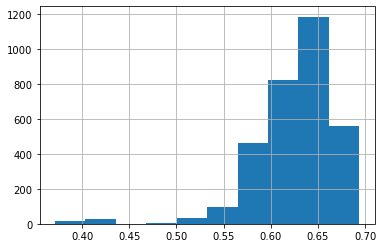

In [10]:
df_main_result_ref.xs(5120, level='train_keep')['cc2_normed_avg'].hist()

In [11]:
aaaa = df_main_result_ref.join(df_main_result_original, how='inner', lsuffix='_ref', rsuffix='_new')

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from thesis_v2.plots.basic import scatter

from scipy.stats import pearsonr, spearmanr

In [13]:
# try to replicate results in 
# 20201114_collect-separatebn.ipynb
# and
# 20201118_collect-separatebn.ipynb
def compute_correlations():
    # 5120
    plt.close('all')
    fig, axes = plt.subplots(nrows=1, ncols=4, squeeze=True, figsize=(20, 6), sharex=True, sharey=True)
    axes = axes.ravel()
    aaaaaa = aaaa.xs(5120, level='train_keep')
    idx_ax = -1
    for idx1, train_keep in enumerate(aaaaaa.index.get_level_values('out_channel').unique()):
        bbb = aaaaaa.xs(train_keep, level='out_channel')
        for idx2, num_layer in enumerate(bbb.index.get_level_values('num_layer').unique()):
            bb = bbb.xs(num_layer, level='num_layer')
            for idx3, readout_type in enumerate( bb.index.get_level_values('readout_type').unique()):
                idx_ax += 1
                ax = axes[idx_ax]
                b = bb.xs(readout_type, level='readout_type')
                n = b.shape[0]
                r = pearsonr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
                r_spearman = spearmanr(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values)[0]
                ax.scatter(b['cc2_normed_avg_ref'].values, b['cc2_normed_avg_new'].values, s=1,
                           label='ch {}, num_l {}, {}, n={}, r={:.2f}/{:.2f}'.format(
                               train_keep, num_layer, readout_type, n, r, r_spearman
                           )
                          )
                
                ax.set_xlabel('ref')
                ax.set_ylabel('new')
                ax.plot([0.5,0.75],[0.5,0.75],linestyle='--',color='k')
                ax.legend()

                # compute pearson
                print(train_keep, num_layer, readout_type)
        
        
    
    plt.show()

16 2 cm-avg
16 2 inst-avg
32 2 cm-avg
32 2 inst-avg


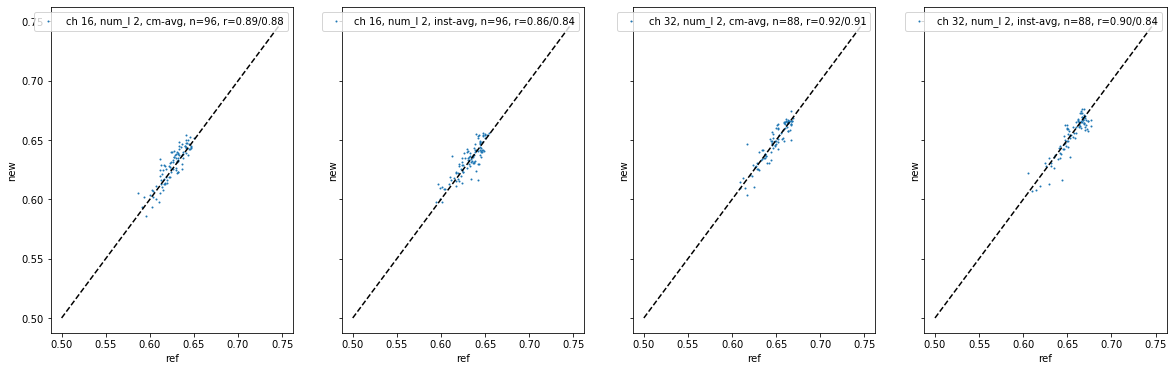

In [14]:
compute_correlations()

In [15]:
# take results from 
# 20201114_collect-separatebn.ipynb and 20201118_collect-separatebn.ipynb
# and compare
df_main_result_ref2 = pd.concat(
    [
        pd.read_pickle(join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201118', 'main_result_separatebn.pkl')),
        pd.read_pickle(join(dir_dict['analyses'], 'yuanyuan_8k_a_3day_refactored', '20201114', 'main_result_separatebn.pkl')),
    ], axis=0
).dropna()
     

In [16]:
df_main_result_ref2

cc2_normed_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
relu     False                mse       0          2         8           2           cm-avg       1280              0.379478   
                                                                                                  2560              0.543094   
                                                                                                  5120              0.580530   
                                                                                     cm-last      1280              0.401936   
                                                                                                  2560              0.573986   
...                                                                                                                      ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560              0.637329   
                                                                                                  5120              0.679273   
                                                                                     inst-last    1280              0.414699   
                                                                                                  2560              0.594899   
                                                                                                  5120              0.667413   

                                                                                                              cc2_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                
relu     False                mse       0          2         8           2           cm-avg       1280           0.181373   
                                                                                                  2560           0.253170   
                                                                                                  5120           0.268277   
                                                                                     cm-last      1280           0.192658   
                                                                                                  2560           0.267190   
...                                                                                                                   ...   
softplus True                 poisson   1          3         32          3           inst-avg     2560           0.294164   
                                                                                                  5120           0.312190   
                                                                                     inst-last    1280           0.197021   
                                                                                                  2560           0.276591   
                                                                                                  5120           0.307430   

                                                                                                              cc_raw_avg  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep               
relu     False                mse       0          2         8           2           cm-avg       1280          0.389241   
                                                                                                  2560          0.481323   
                                                                                                  5120          0.498672   
                                                                                     cm-last      1280          0.407067   
                                                                           

In [17]:
df_main_result_ref2['cc2_normed_avg']

act_fn    ff_1st_bn_before_act  loss_type  model_seed  num_layer  out_channel  rcnn_bl_cls  readout_type  train_keep
relu      False                 mse        0           2          8            2            cm-avg        1280          0.379478
                                                                                                          2560          0.543094
                                                                                                          5120          0.580530
                                                                                            cm-last       1280          0.401936
                                                                                                          2560          0.573986
                                                                                                                          ...   
softplus  True                  poisson    1           3          32           3            inst-avg      256

In [18]:
aaaa = df_main_result_ref2.join(df_main_result_original, how='inner', lsuffix='_ref', rsuffix='_new')

In [19]:
aaaa

cc2_normed_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                       
softplus True                 mse       0          2         16          4           cm-avg       5120                  0.625136   
                                        1          2         16          6           cm-avg       5120                  0.628268   
         False                poisson   1          2         32          2           inst-avg     5120                  0.635646   
relu     True                 poisson   1          2         32          6           cm-avg       5120                  0.658961   
softplus False                poisson   1          2         16          7           cm-avg       5120                  0.654028   
...                                                                                                                          ...   
relu     True                 mse       0          2         32          5           inst-avg     5120                  0.662697   
         False                mse       1          2         16          6           inst-avg     5120                  0.647351   
                                                             32          5           cm-avg       5120                  0.664420   
                              poisson   1          2         32          7           inst-avg     5120                  0.657843   
         True                 poisson   1          2         32          5           cm-avg       5120                  0.648964   

                                                                                                              cc2_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                    
softplus True                 mse       0          2         16          4           cm-avg       5120               0.288019   
                                        1          2         16          6           cm-avg       5120               0.288923   
         False                poisson   1          2         32          2           inst-avg     5120               0.292383   
relu     True                 poisson   1          2         32          6           cm-avg       5120               0.303517   
softplus False                poisson   1          2         16          7           cm-avg       5120               0.300919   
...                                                                                                                       ...   
relu     True                 mse       0          2         32          5           inst-avg     5120               0.305404   
         False                mse       1          2         16          6           inst-avg     5120               0.298341   
                                                             32          5           cm-avg       5120               0.305407   
                              poisson   1          2         32          7           inst-avg     5120               0.303090   
         True                 poisson   1          2         32          5           cm-avg       5120               0.298865   

                                                                                                              cc_raw_avg_ref  \
act_fn   ff_1st_bn_before_act loss_type model_seed num_layer out_channel rcnn_bl_cls readout_type train_keep                   
softplus True                 mse       0          2         16          4           cm-avg       5120              0.519050   
                                        1          2         16          6           cm-avg       5120              0.520683   
         False                poisson   1          2         32          2           inst-avg     5120              0.523975   
relu     True                 poisson   1          2         32          6 

16 2 cm-avg
16 2 inst-avg
32 2 inst-avg
32 2 cm-avg


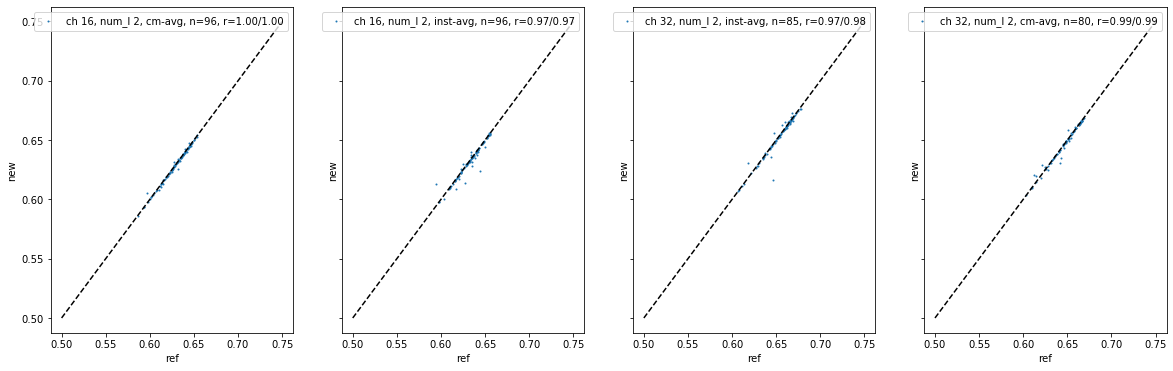

In [20]:
compute_correlations()
# card to card variation... interesting.

In [21]:
def collect_max_d_model():
    ret = df_main_result[
        df_main_result.index.get_level_values(
            'multi_path_hack'
            # here .values is important. otherwise this code does not work properly. not sure why.
            # pandas is complicated.
        ).map(lambda x: x.startswith('leD')).values & (
             df_main_result.index.get_level_values('multi_path_hack').map(lambda x: int(x[3:])) ==  df_main_result.index.get_level_values('rcnn_bl_cls')
        )
    ]
                                                                                             
    return ret.droplevel('multi_path_hack').dropna()

In [22]:
aaaa = collect_max_d_model().join(df_main_result_original, how='inner', lsuffix='_ref', rsuffix='_new')

16 2 cm-avg
16 2 inst-avg
32 2 inst-avg
32 2 cm-avg


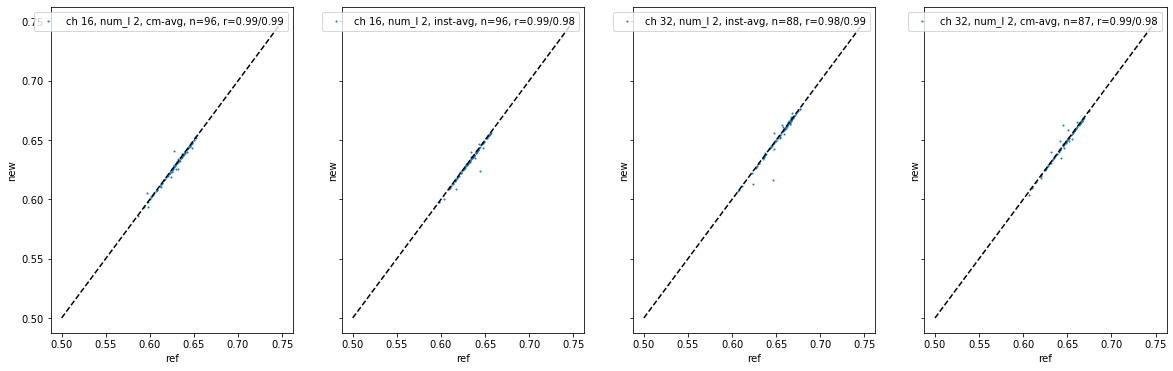

In [23]:
compute_correlations()
# card to card variations from geD1 to leDX. interesting.
# will use all available data from three sources as baseline.